In [1]:
from math import gamma
import numpy as np
import matplotlib.pyplot as plt

## 1-3. 確率論のおさらい
機械学習の方法を理論的に支えているのは確率論や統計学です。なぜなら
- よっぽどのことがない限り未来の予想が100%当たることは考えにくい

からです。
>純粋に古典力学や電磁気学で取り扱うことのできる（すなわち与えられた初期値に対し、微分方程式などで確定的に未来が定まる）タイプの問題はこの限りではありませんが、このような「明らかに制約のある」タイプの問題を扱う場合はむしろ積極的にその事前知識を機械学習に組み込むのが良いでしょう。これに関連した意見として、上に挙げたSuttonの記事に一石を投じる形でMax Welling氏（この人は変分自己符号化器と呼ばれる教師なし学習の提案者の一人として有名です）による[このような記事](https://staff.fnwi.uva.nl/m.welling/wp-content/uploads/Model-versus-Data-AI-1.pdf)もあります。

そういうわけなので、簡単なおさらいからスタートします。
今回は簡単のため全ての確率は確率密度関数 $p(x)$ で書けると考えます。これは以下の定義を満たす実数関数です。


$$
\forall x \in X, \quad 0 \leq p(x), \quad \int_X p(x) dx = 1
$$

ベクトル値の変数を考えても良いです。$n$成分の場合

$$
\forall {\bf x} = (x^1, x^2, \dots, x^n) \in X^n,
\quad
0 \leq p({\bf x}) ,
\quad
\int_{X^n} p({\bf x}) d {\bf x} = 1
$$

と書くことにします。積分範囲が明らかな場合は略します。

### 同時確率と周辺化
変数が2種類以上ある場合の確率を **同時確率** といいます：

$$
p(x,y)
$$

これは単なる $x,y$ についての確率なわけですが、
わざわざ同時確率と呼ぶ場合は $x$ と $y$ に意味的な違いがあり、これらを差別化して考えていることが多いと思います。同時確率の例として、たとえば $x=$画像、$y=$そのラベル といった具合です。

説明のために簡単な離散確率

$\quad$ |x=画像1|x=画像2|x=画像3|
:---:|:---:|:---:|:---:|
y=犬|$\frac{1}{12}$|$\frac{3}{12}$|$\frac{2}{12}$
y=猫|$\frac{2}{12}$|$\frac{1}{12}$|$\frac{3}{12}$


を考えてみます。これは画像 $x$ とラベル $y$ が同時に観測される確率を表したものです。
ただし、これでは今ひとつ意味が捉えにくいかもしれません。たとえば

$$
p(x) = \sum_y p(x, y)
$$

を考えてみましょう。すると

$\quad$ |x=画像1|x=画像2|x=画像3|
:---:|:---:|:---:|:---:|
y=犬|$\frac{1}{12}$|$\frac{3}{12}$|$\frac{2}{12}$
y=猫|$\frac{2}{12}$|$\frac{1}{12}$|$\frac{3}{12}$
p(x)|$\frac{1+2}{12}=\frac{1}{4}$|$\frac{3+1}{12}=\frac{1}{3}$|$\frac{2+3}{12}=\frac{5}{12}$

となり、確率$1/4$で画像1が、確率$1/3$で画像2が、確率$5/12$で画像3が生成されることを表しています。

一方で

$$
p(y) = \sum_x p(x,y)
$$

を計算してみると

$\quad$ |x=画像1|x=画像2|x=画像3|p(y)
:---:|:---:|:---:|:---:|:---:
y=犬|$\frac{1}{12}$|$\frac{3}{12}$|$\frac{2}{12}$|$\frac{1+3+2}{12}=\frac{1}{2}$
y=猫|$\frac{2}{12}$|$\frac{1}{12}$|$\frac{3}{12}$|$\frac{2+1+3}{12}=\frac{1}{2}$

となり、全体で犬と判別される確率と猫と判別される確率が半々であることがわかります。このような操作を **周辺化** とよびます。
>なぜこの操作を周辺化と呼ぶのか疑問でしたが、最近、とある同僚の数学者の方に尋ねると、表に書いた時、$x$だけの確率や$y$だけの確率は表の端＝「周辺」に対応した値だから、このような名前がつけられているのでしょうとのことでした。


### 条件付き確率
$p(x,y)$は「画像$x$とラベル$y$が同時に現れる確率」でしたが、これと
「画像$x$が$y=$犬or猫に判別される確率」はどれほど違うでしょうか？
これはほとんど同じに見えます。例えば表を縦方向にみると、

$\quad$ |<span style="color: red; ">x=画像1</span>|<span style="color: blue; ">x=画像2</span>|<span style="color: green; ">x=画像3</span>|
:---:|:---:|:---:|:---:|
y=犬|$\color{red}{\frac{1}{12}}$|$\color{blue}{\frac{3}{12}}$|$\color{green}{\frac{2}{12}}$
y=猫|$\color{red}{\frac{2}{12}}$|$\color{blue}{\frac{1}{12}}$|$\color{green}{\frac{3}{12}}$

であり、<span style="color: red; ">画像1は猫</span>、<span style="color: blue; ">画像2は犬</span>、<span style="color: green; ">画像3は猫</span> とラベル付けされる確率が高い事がわかります。
しかし画像を一つに固定した時、犬/猫の判別確率が足して1になっていません。これは丁度、周辺確率$p(x)$で割っておけば再規格化できます：

$$
p(y|x) = \frac{p(x,y)}{p(x)}
$$

このように再規格化しておけば、どんな$x$についても$y$の和を取ると1になります：

$$
\sum_{y} p(y|x) = 1
$$

今の場合、周辺確率$p(x)$は上で計算した

$\quad$ |x=画像1|x=画像2|x=画像3|
:---:|:---:|:---:|:---:|
p(x)|$\frac{1+2}{12}=\frac{1}{4}$|$\frac{3+1}{12}=\frac{1}{3}$|$\frac{2+3}{12}=\frac{5}{12}$

があるので、

$\quad$|<span style="color: red; ">x=画像1</span>|<span style="color: blue; ">x=画像2</span>|<span style="color: green; ">x=画像3</span>|
:---:|:---:|:---:|:---:|
p(y=犬$\mid x$)|$\color{red}{\frac{1}{3}}$|$\color{blue}{\frac{3}{4}}$|$\color{green}{\frac{2}{5}}$
p(y=猫$\mid x$)|$\color{red}{\frac{2}{3}}$|$\color{blue}{\frac{1}{4}}$|$\color{green}{\frac{3}{5}}$

となります。これで<span style="color: red; ">画像1は$\frac{2}{3}$で猫</span>、<span style="color: blue; ">画像2は$\frac{3}{4}$で犬</span>、<span style="color: green; ">画像3は$\frac{3}{5}$で猫</span>であることがわかります。

同様に

$$
p(x|y)=\frac{p(x,y)}{p(y)}
$$

は$y$がどの画像由来である可能性が高いかを表します：

$\quad$|x=画像1|x=画像2|x=画像3
:---:|:---:|:---:|:---:|
<span style="color: red; ">p(y=犬$\mid x$)</span>|$\color{red}{\frac{1}{6}}$|$\color{red}{\frac{3}{6}}$|$\color{red}{\frac{2}{6}}$
<span style="color: blue; ">p(y=猫$\mid x$)</span>|$\color{blue}{\frac{2}{6}}$|$\color{blue}{\frac{1}{6}}$|$\color{blue}{\frac{3}{6}}$


この場合、<span style="color: red; ">犬と判別されたものは$\frac{3}{6}$で画像2由来</span>、<span style="color: blue; ">猫と判別されたのは$\frac{3}{6}$で画像3由来</span>とわかります。

また、定義から自明に

$$
p(x|y)p(y)=p(x,y)=p(y|x)p(x)
$$

が成り立ちます。これをベイズの定理と呼びます。


### ガウス分布と次元の呪い
1次元ガウス分布は

$$
p(x) = \frac{1}{\sqrt{2\pi}} e^{- \frac{x^2}{2}}
$$

という確率分布です。同様にして n 次元確率分布は

$$
p({\bf x}) = \prod_{i=1}^n p(x_i)
$$

で定義されます。n次元のガウス分布は実は動径方向 $r=\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$ にしか依存しない確率分布なのですが、ここで一見**自明に思える問** をしてみます：

- n次元のガウス分布から$N$個のベクトル ${\bf x}$ をサンプルしたとき、その動径 $r^2$ は0周りに集中するか？

例えば2次元ガウス分布から10000個の${\bf x}$をサンプルし、プロットすると


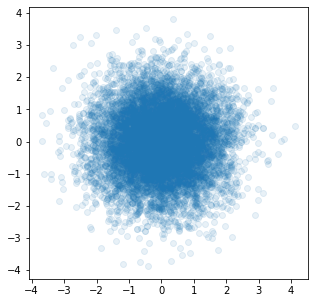

In [2]:
X = np.random.randn(10000, 2)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], alpha=0.1); plt.show()

のようになります。明らかに$r=0$にサンプルが集中しているのがわかります。実際ヒストグラムを描いてみると

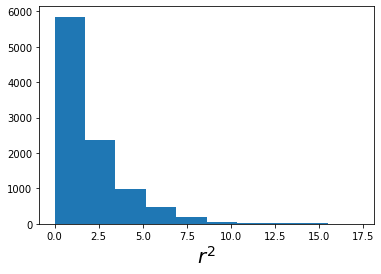

In [3]:
r = np.sum(X**2, axis=1)
plt.hist(r); plt.xlabel(r"$r^2$", fontsize=20); plt.show()

となって、$r^2=0$周りに確かに集中しているのがわかります。これは一見、次元が上がっても同じように感じられます。しかしそうではないのです。実際、100次元で同じ計算を行ってみると：

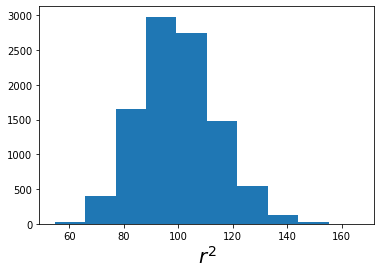

In [4]:
X = np.random.randn(10000, 100)
r = np.sum(X**2, axis=1)
plt.hist(r); plt.xlabel(r"$r^2$", fontsize=20); plt.show()

こんな風に、$r^2\approx 100$のあたりにサンプルが集中しているのがわかります。いわば100次元ガウス分布は、$r^2\approx 100$にサンプルが集中した**球面上一様分布**のようなものなのです。なぜこうなるのかは、n次元ガウス分布を$r^2$の分布に 周辺化 したときに何が起こるかを考えるとわかります。

まず、確率分布はそれだけでは意味をなさず、

$$
p({\bf x})d{\bf x}
$$

と、微小体積 $d{\bf x}$ を伴って初めて、${\bf x} \sim {\bf x} + d{\bf x}$にサンプルを見出す確率、という解釈が付けられるものであったことを思い出しておきましょう。微小体積 $d{\bf x}$ は直交座標$(x_1, x_2, \dots, x_n)$をもちいて

$$
d {\bf x} = dx_1 dx_2 \dots dx_n
$$

でした。したがって今の場合、

$$
p({\bf x})d{\bf x} = \frac{1}{(2 \pi)^{n/2}} e^{- \frac{x_1^2 + x_2^2 + \dots + x_n^2}{2}} dx_1 dx_2 \dots dx_n
$$

となります。ところで、直交座標から極座標に移ると、単位(n-1)次元球面の体積要素を$d\Omega$として

$$
\left. \begin{array}{ll}
e^{- \frac{x_1^2 + x_2^2 + \dots + x_n^2}{2}} = e^{- \frac{r^2}{2}}
\\
dx_1 dx_2 \dots dx_n = r^{n-1} dr d\Omega
\end{array} \right.
$$

であることがわかります。$d\Omega$だけ先に積分（周辺化）すると結局

$$
\left. \begin{array}{ll}
\int_{\Omega} p({\bf x})d{\bf x} = p(r^2) d r^2 \\
p(r^2)=
\frac{1}{2^{n/2} \Gamma(n/2)}
\exp{\Big( - \frac{r^2}{2} \Big)} 
(r^2)^{\frac{n}{2} - 1}
\end{array} \right.
$$

であることが示せます。この $p(r^2)$ が上の数値実験で確認していたヒストグラムに対応し、これはヤコビアン由来の $(r^2)^{\frac{n}{2} - 1}$ の項がかけられているため、最早ガウス分布ではありません。とくにこれは **カイ二乗分布** と呼ばれます：





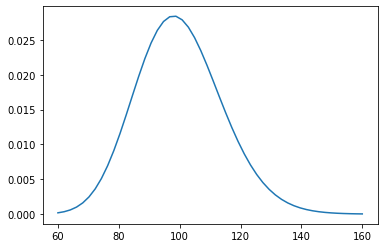

In [5]:
def chi_squared(x, n):
    return np.exp(-x/2)*x**(n/2-1)/(2**(n/2)*gamma(n/2))

x = np.linspace(60, 160)
plt.plot(x, chi_squared(x, n=100)); plt.show()

> ちなみに、ここで説明したことは、いわゆる[カイ二乗検定](https://ja.wikipedia.org/wiki/カイ二乗検定)の導出につかえます。

### 大数の法則
確率の話の最後に、重要な法則を説明しましょう。
確率分布$p(x)$からの独立なサンプル$\{ x_1, x_2, \dots, x_N \}$があったとき、
平均値

$$
\frac{1}{N} \sum_{n=1}^N x_n
$$

が$N \to \infty$でどう振る舞うかに関することです。またもやガウス分布（標準正規分布）で実験してみます：


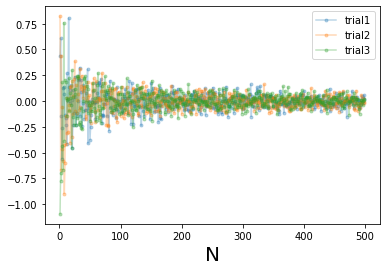

In [6]:
num = np.arange(1, 500); plt.xlabel("N", fontsize=20)
plt.plot(num, [np.average(np.random.randn(N)) for N in num], '.-', alpha=0.3, label='trial1')
plt.plot(num, [np.average(np.random.randn(N)) for N in num], '.-', alpha=0.3, label='trial2')
plt.plot(num, [np.average(np.random.randn(N)) for N in num], '.-', alpha=0.3, label='trial3')
plt.legend(); plt.show()

N=1~500までランダムにサンプリングして計算した $x$ の平均値を縦軸に、3回別の施行で繰り返しプロットしています。どの場合も標準正規分布の平均値

$$
\frac{1}{N} \sum_{n=1}^N x_n
\to
0 = \langle x \rangle_p
$$

に収束しているように見えます。これは**大数の法則** (または**中心極限定理**)と呼ばれ、一般の確率分布 $p(x)$ についても、

$$
\frac{1}{N} \sum_{n=1}^N x_n
\to
\langle x \rangle_p
$$

となることがわかります。
>$x_n$が確率変数であり確定した値ではないため、ここでの$\to$の意味は、厳密に言えば通常の極限とは異なりますが、以下の議論ではそれが問題にならないような場合しか扱いません。
詳しく知りたい人は「確率変数の収束」で調べてみてください。

以下ではこの事実を何度か用います。